In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fuel-concumption-ratings-2023/Fuel Consumption Ratings 2023.csv
/kaggle/input/fuel-consumption-csv/Fuel Consumption Ratings 2023 2.csv


In [2]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=bdd1e1255b2d2035dc35090479d04f59f547a53d363ac354dd7fd3f3f53a5ca3
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [4]:
df = pd.read_csv("/kaggle/input/fuel-consumption-csv/Fuel Consumption Ratings 2023 2.csv", encoding='latin1')
df = df.dropna()


In [5]:
df.describe()



,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


**We want to explore relationships between cols of the dataset:**
using correlaion coefficients.

In [7]:
df1 = df.drop(['Make', 'Model','Vehicle Class','Transmission','Fuel Type','Year'], axis=1)
df1

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,1.5,4.0,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,1.5,4.0,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,1.5,4.0,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,3.5,6.0,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,3.0,6.0,13.8,11.2,12.4,23.0,291.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...
828,2.0,4.0,10.2,7.9,9.2,31.0,215.0,5.0,5.0
829,2.0,4.0,10.3,8.2,9.4,30.0,218.0,5.0,5.0
830,2.0,4.0,11.1,8.7,10.0,28.0,233.0,5.0,7.0
831,2.0,4.0,10.5,8.4,9.6,29.0,223.0,5.0,5.0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = np.array(df1['CO2 Emissions (g/km)'])
X = np.array(df1.drop('CO2 Emissions (g/km)', axis =1)) # dropping the target variable and combining the features
#splitting data for train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
b_init = 0 # bias
w_init = np.array(np.ones(X_train.shape[1])) #weights
w_init

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
def predict_single_loop(x, w, b): 
    p = np.dot(x,w)  + b                
    return p

In [12]:
x_vec = X_train[0, :]
print(X_train[0,:])
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

[ 3.6  6.  13.8 10.1 12.2 23.   4.   5. ]
x_vec shape (8,), x_vec value: [ 3.6  6.  13.8 10.1 12.2 23.   4.   5. ]
f_wb shape (), prediction: 77.7


In [13]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2      
    cost = cost / (2 * m)                      
    return cost

In [14]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 18369.455653153163


In [15]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [16]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -180.71246246246253
dj_dw at initial w,b: 
 [ -646.26454955 -1130.45975976 -2482.92888889 -1844.15237237
 -2195.45129129 -4457.65555556  -731.03618619  -878.58873874]


In [17]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [18]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 0.001

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  4848.39   
Iteration 1000: Cost   139.41   
Iteration 2000: Cost   135.13   
Iteration 3000: Cost   132.47   
Iteration 4000: Cost   130.62   
Iteration 5000: Cost   129.29   
Iteration 6000: Cost   128.31   
Iteration 7000: Cost   127.56   
Iteration 8000: Cost   126.98   
Iteration 9000: Cost   126.51   
b,w found by gradient descent: 4.41,[ -2.15847418   2.78075448   8.24842854   6.23008201   7.05979609
   1.98517143 -10.6329566   -0.27809517] 
prediction: 277.94, target value: 285.0
prediction: 272.56, target value: 274.0
prediction: 373.15, target value: 374.0
prediction: 189.51, target value: 191.0
prediction: 290.31, target value: 298.0
prediction: 193.44, target value: 195.0
prediction: 208.59, target value: 203.0
prediction: 264.85, target value: 265.0
prediction: 321.15, target value: 326.0
prediction: 321.15, target value: 326.0
prediction: 244.73, target value: 272.0
prediction: 257.08, target value: 261.0
prediction: 291.98, target value: 299.0
predic

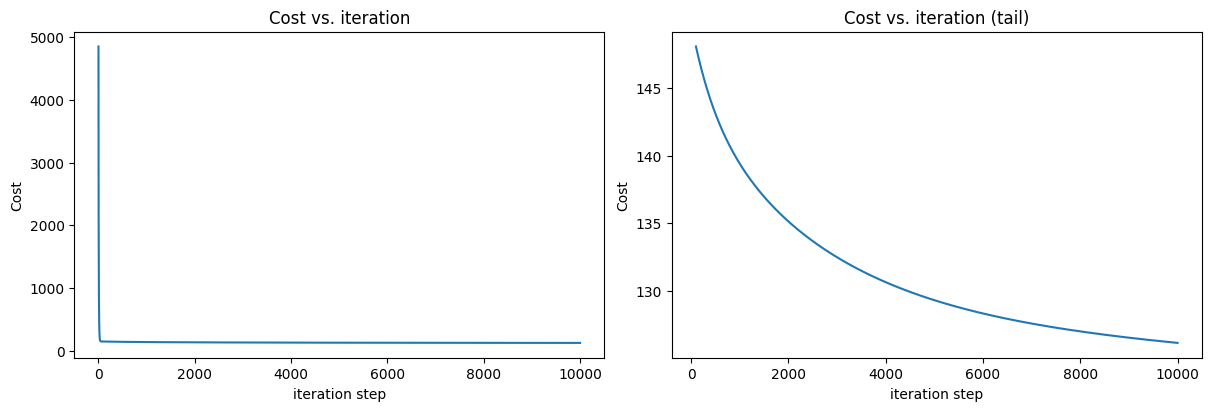

In [19]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

**Implementing linear Regression using Skitlearn**




*Scale/normalize the training data*

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [21]:
#Scale/normalize the training data

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)


In [22]:
sgdr = SGDRegressor(max_iter=5000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=5000)
number of iterations completed: 22, number of weight updates: 14653.0


In [23]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")


model parameters:                   w: [ -0.89474557   6.97922053   9.70139203  12.17258608  10.87199136
  -3.38954095 -23.26178794  -3.0503389 ], b:[259.71121146]


In [24]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:3]}" )
print(f"Target values \n{y_train[:3]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[282.21284536 277.21893467 373.83861827]
Target values 
[285. 274. 374.]


In [25]:
names = df1.drop('CO2 Emissions (g/km)', axis =1).columns
names = [name for name in names]
names

['Engine Size (L)',
 'Cylinders',
 'Fuel Consumption (L/100Km)',
 'Hwy (L/100 km)',
 'Comb (L/100 km)',
 'Comb (mpg)',
 'CO2 Rating',
 'Smog Rating']

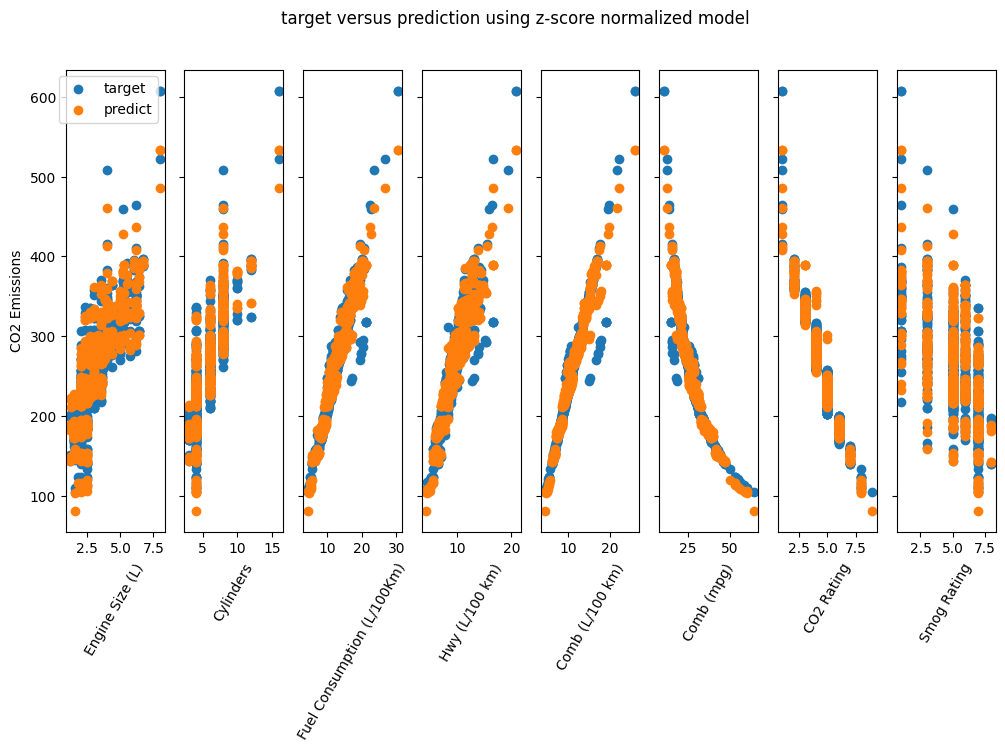

In [26]:
fig,ax=plt.subplots(1,len(names),figsize=(12,6),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(names[i],rotation=60)
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("CO2 Emissions"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()